

1.   Подключение к хранилищу и загрузка в файловую систему
2.   Разархивирование
2.   Определение директорий с изображениями
2.   Как выглядят файлы в директориях
2.   Подсчет количества изображений в директориях 



In [42]:
#Подключение к хранилищу с архивом
#Загрузка архива и сохранение в /tmp/horse-or-human.zip
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip \
    -O /tmp/horse-or-human.zip

--2021-01-27 17:47:59--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.124.128, 172.217.212.128, 172.217.214.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.124.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 149574867 (143M) [application/zip]
Saving to: ‘/tmp/horse-or-human.zip’

/tmp/horse-or-human 100%[===================>] 142.65M   174MB/s    in 0.8s    

2021-01-27 17:48:00 (174 MB/s) - ‘/tmp/horse-or-human.zip’ saved [149574867/149574867]



In [43]:
#Набор для валидации
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/validation-horse-or-human.zip \
    -O /tmp/validation-horse-or-human.zip

--2021-01-27 17:48:03--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/validation-horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.202.128, 173.194.198.128, 209.85.234.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.202.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11480187 (11M) [application/zip]
Saving to: ‘/tmp/validation-horse-or-human.zip’

/tmp/validation-hor 100%[===================>]  10.95M  --.-KB/s    in 0.1s    

2021-01-27 17:48:04 (74.6 MB/s) - ‘/tmp/validation-horse-or-human.zip’ saved [11480187/11480187]



In [45]:
import os
import zipfile
#Доступ к файловой системе и разархивирование .zip в /tmp/horse-or-human
#Для тестирования
local_zip = '/tmp/horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/horse-or-human')
#Для валидации
local_zip = '/tmp/validation-horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/validation-horse-or-human')
zip_ref.close()

In [47]:
#Определение директории в которой хранятся изображения лошадей (для ImageGenerator)
training_horse_dir = os.path.join('/tmp/horse-or-human/horses')
#Определение директории в которой хранятся изображения людей
training_human_dir = os.path.join('/tmp/horse-or-human/humans')


# Directory with our training horse pictures
validation_horse_dir = os.path.join('/tmp/validation-horse-or-human/horses')

# Directory with our training human pictures
validation_human_dir = os.path.join('/tmp/validation-horse-or-human/humans')

In [48]:
#Имена файлов в директориях
train_horse_names = os.listdir(training_horse_dir)
print(train_horse_names[:10])
train_human_names = os.listdir(training_human_dir)
print(train_human_names[:10])

#Для валидации
validation_horse_hames = os.listdir(validation_horse_dir)
print(validation_horse_hames[:10])

validation_human_names = os.listdir(validation_human_dir)
print(validation_human_names[:10])

['horse49-3.png', 'horse12-9.png', 'horse24-8.png', 'horse47-6.png', 'horse33-3.png', 'horse19-1.png', 'horse08-7.png', 'horse34-1.png', 'horse42-4.png', 'horse16-2.png']
['human10-03.png', 'human04-17.png', 'human01-00.png', 'human15-17.png', 'human03-29.png', 'human08-07.png', 'human04-15.png', 'human02-15.png', 'human17-19.png', 'human12-08.png']
['horse4-556.png', 'horse5-103.png', 'horse4-302.png', 'horse3-055.png', 'horse4-000.png', 'horse4-548.png', 'horse1-554.png', 'horse1-384.png', 'horse3-141.png', 'horse1-539.png']
['valhuman05-07.png', 'valhuman05-08.png', 'valhuman01-17.png', 'valhuman03-18.png', 'valhuman03-20.png', 'valhuman03-04.png', 'valhuman02-09.png', 'valhuman02-03.png', 'valhuman02-00.png', 'valhuman02-01.png']


In [49]:
#Сколько всего изображений в директориях
print('total training horses images: ', len(os.listdir(training_horse_dir)))
print('total training humans images: ', len(os.listdir(training_human_dir)))
print('total validation horse images:', len(os.listdir(validation_horse_dir)))
print('total validation human images:', len(os.listdir(validation_human_dir)))

total training horses images:  500
total training humans images:  527
total validation horse images: 128
total validation human images: 128


**Как выглядят изображения в директориях?**

In [50]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
#Параметры для графа. Вывод изображения 4х4
nrows = 4
ncols = 4
#Индекс для прохода по изображениям
img_index = 0

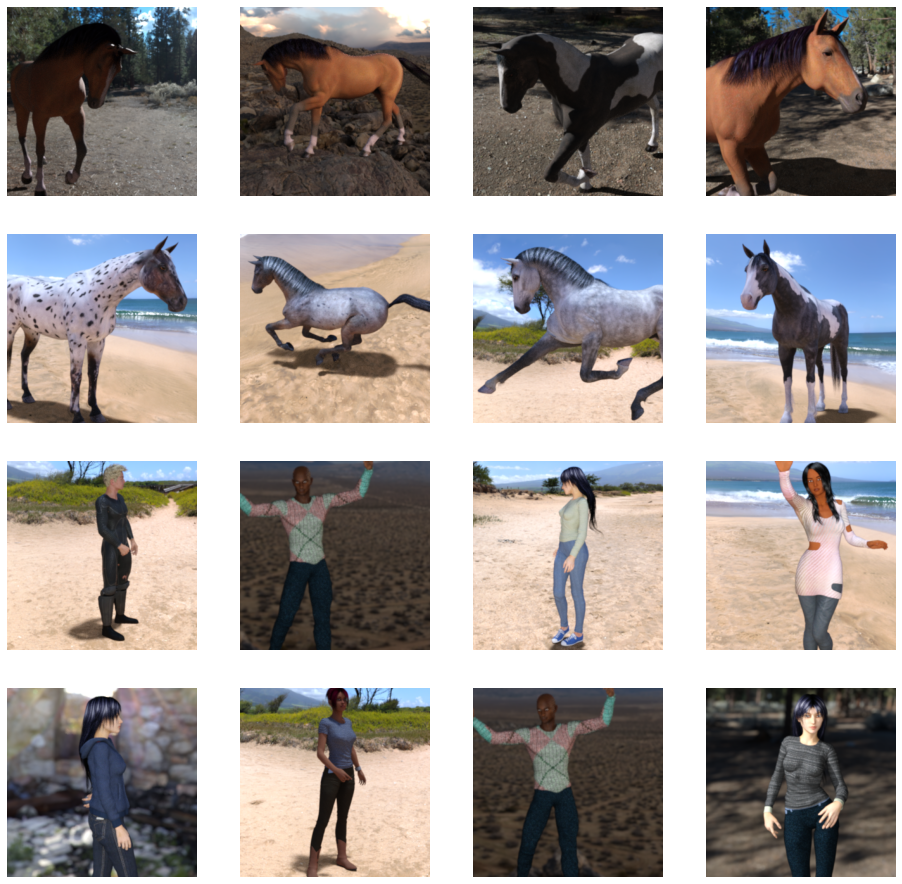

In [51]:
#Настройка фигуры matpotlib для вывода изображений 4х4
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

img_index +=8
next_horse_pix = [os.path.join(training_horse_dir, fname)
for fname in train_horse_names[img_index-8:img_index]]
next_human_pix = [os.path.join(training_human_dir, fname)
for fname in train_human_names[img_index-8:img_index]]

for i, img_path in enumerate(next_horse_pix + next_human_pix):
  #Вызываем subplot, индекс с 1
  sp = plt.subplot(nrows, ncols, i + 1)
  #Выключаем оси
  sp.axis('Off')

  #Читаем изображение
  img = mpimg.imread(img_path)
  plt.imshow(img)
#Изображения выбираются случайно
plt.show()

**Построение модели**

In [52]:
import tensorflow as tf

In [53]:

model = tf.keras.models.Sequential([
                                   #Первая свертка
                                   tf.keras.layers.Conv2D(16, (3,3), activation = 'relu', input_shape = (300, 300, 3)),
                                   tf.keras.layers.MaxPooling2D(2,2),
                                   #Вторая свертка
                                   tf.keras.layers.Conv2D(32, (3,3), activation = 'relu'),
                                   tf.keras.layers.MaxPooling2D(2,2),
                                   #Третья свертка
                                   tf.keras.layers.Conv2D(64, (3,3), activation = 'relu'),
                                   tf.keras.layers.MaxPooling2D(2,2),
                                   #Четвертая свертка
                                   tf.keras.layers.Conv2D(64, (3,3), activation = 'relu'),
                                   tf.keras.layers.MaxPooling2D(2,2),
                                   #Пятая свертка
                                   tf.keras.layers.Conv2D(64, (3,3), activation = 'relu'),
                                   tf.keras.layers.MaxPooling2D(2,2),
                                   #Передача эстафеты DNN
                                   tf.keras.layers.Flatten(),
                                   tf.keras.layers.Dense(512, activation = 'relu'),
                                   #У выходного слоя 1 нейрон т.к. классификация идет по одному из классов (0 - лошадь, 1 - человек), ф-я активации - сигмоида
                                   tf.keras.layers.Dense(1, activation = 'sigmoid')
])

In [58]:
#Информация по модели
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 298, 298, 16)      448       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 149, 149, 16)      0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 147, 147, 32)      4640      
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 71, 71, 64)        18496     
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 35, 35, 64)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 33, 33, 64)       

In [59]:
#Компиляция модели
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['accuracy'])

**Предобработка данных**

Устанавливаем генератор, который считает изображения из папок, конвертирует их в float32 тензоры и скормит их вместе с установленными лейблами нейросети (изображения 300х300 и лейблы). Один для тренировки, один для валидации.

In [60]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
#Нормализация изображений
train_datagen = ImageDataGenerator(rescale = 1/255)
validation_datagen = ImageDataGenerator(rescale=1/255)

train_generator = train_datagen.flow_from_directory(
    #Директория для тренировки по изображениям
    '/tmp/horse-or-human/',
    target_size = (300, 300),
    #Загружаем пакетами
    batch_size = 128,
    #Т.к. используем ошибку binary_crossentropy, лейблы устанавливаем бинарные
    class_mode = 'binary')

validation_generator = validation_datagen.flow_from_directory(
        '/tmp/validation-horse-or-human/',  
        target_size=(300, 300),
        batch_size=32,
        class_mode='binary')

Found 1027 images belonging to 2 classes.
Found 256 images belonging to 2 classes.


**Тренировка модели**

In [61]:
history = model.fit(
    train_generator,
    steps_per_epoch = 8,
    epochs = 15,
    verbose = 1,
    validation_data = validation_generator,
    validation_steps = 8)

Epoch 1/15
8/8 [==============================] - 10s 1s/step - loss: 1.0479 - accuracy: 0.4486 - val_loss: 0.6808 - val_accuracy: 0.5000
Epoch 2/15
8/8 [==============================] - 8s 1s/step - loss: 0.7520 - accuracy: 0.6047 - val_loss: 0.4879 - val_accuracy: 0.7969
Epoch 3/15
8/8 [==============================] - 8s 1s/step - loss: 1.3997 - accuracy: 0.8006 - val_loss: 0.8575 - val_accuracy: 0.6914
Epoch 4/15
8/8 [==============================] - 8s 1s/step - loss: 0.3299 - accuracy: 0.8602 - val_loss: 0.9758 - val_accuracy: 0.7891
Epoch 5/15
8/8 [==============================] - 8s 1s/step - loss: 0.1529 - accuracy: 0.9497 - val_loss: 1.1968 - val_accuracy: 0.8047
Epoch 6/15
8/8 [==============================] - 8s 1s/step - loss: 0.1493 - accuracy: 0.9572 - val_loss: 0.8292 - val_accuracy: 0.8555
Epoch 7/15
8/8 [==============================] - 8s 1s/step - loss: 0.0948 - accuracy: 0.9676 - val_loss: 0.6507 - val_accuracy: 0.8867
Epoch 8/15
8/8 [========================

**Запуск модели**

Выберем одно или несколько изображений из файловой системы, пропустим через модель и попробуем определить что на изображении - человек или лошадь

In [41]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
#Загружаем файл
upload = files.upload()

for fn in upload.keys():

  #Предсказываем что на изображении
  path = '/content/' + fn
  img = image.load_img(path, target_size=(300, 300))
  #Преобразование изображения в массив
  x = image.img_to_array(img)
  #Добавление новой оси к массиву
  x = np.expand_dims(x, axis = 0)

  #Соединяем массивы по вертикали
  images = np.vstack([x])
  #Предсказание
  classes = model.predict(images, batch_size = 10)
  print(classes[0])
  if classes[0] >0.5:
    print (fn + 'is a human')
  else:
    print (fn + 'is a horse')

Saving h_1.jpg to h_1 (8).jpg
Saving h_2.jpg to h_2 (9).jpg
Saving h_3.jpg to h_3 (5).jpg
Saving h_3.png to h_3 (9).png
Saving h_4.jpg to h_4 (5).jpg
Saving hum_1.jpg to hum_1 (6).jpg
Saving hum_2.jpg to hum_2 (5).jpg
Saving hum_3.jpg to hum_3 (5).jpg
Saving hum_4.jpg to hum_4 (5).jpg
[1.]
h_1.jpgis a human
[0.]
h_2.jpgis a horse
[0.]
h_3.jpgis a horse
[0.]
h_3.pngis a horse
[0.]
h_4.jpgis a horse
[0.]
hum_1.jpgis a horse
[1.]
hum_2.jpgis a human
[1.]
hum_3.jpgis a human
[1.]
hum_4.jpgis a human


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in true_divide


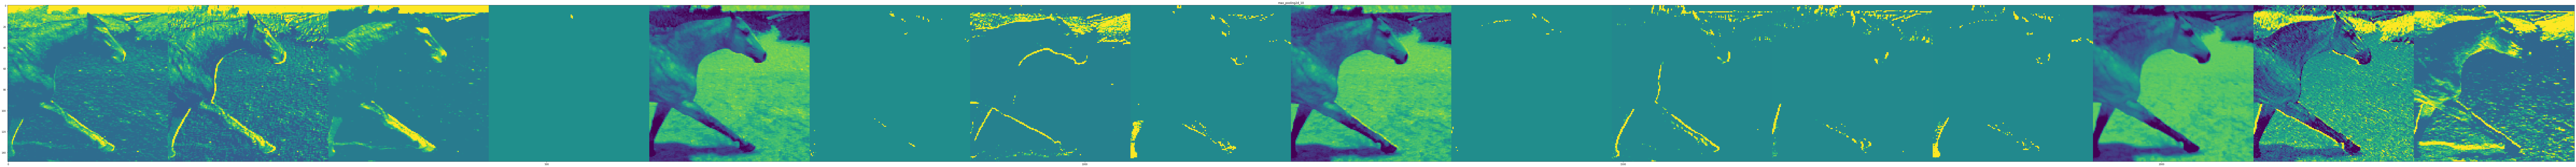

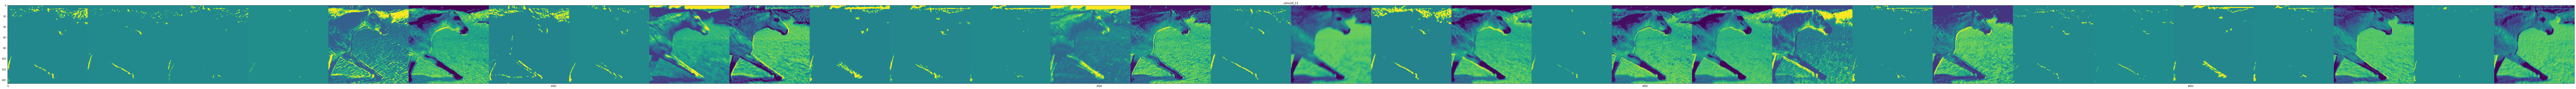

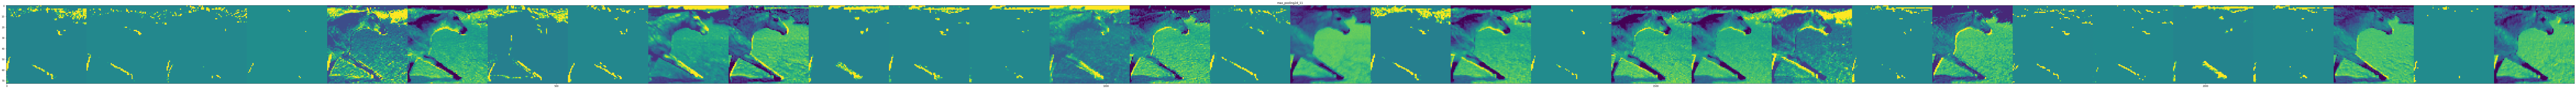

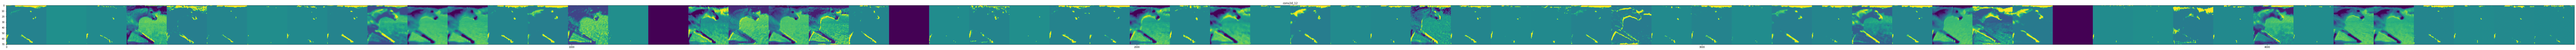

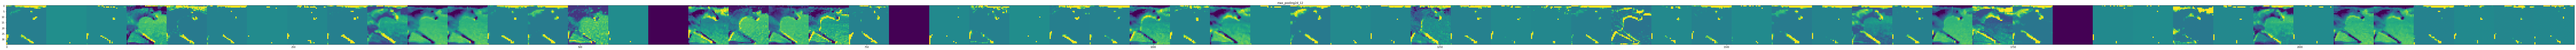

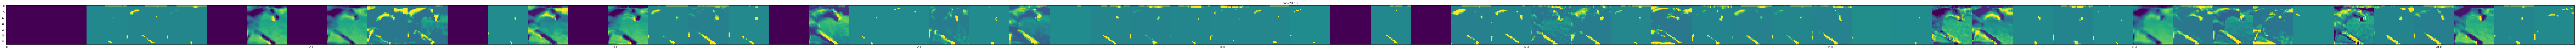

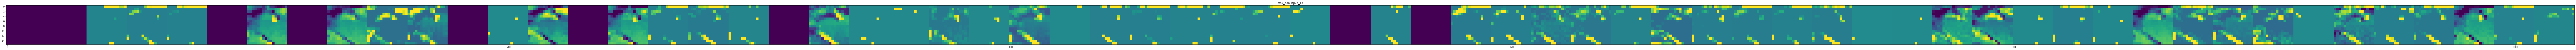

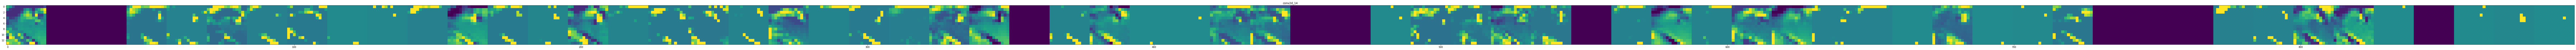

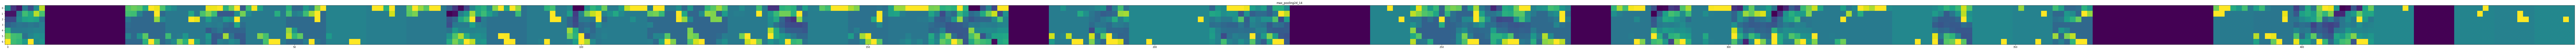

In [72]:
import numpy as np
import random
from tensorflow.keras.preprocessing.image import img_to_array, load_img

# Let's define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model after
# the first.
successive_outputs = [layer.output for layer in model.layers[1:]]
#visualization_model = Model(img_input, successive_outputs)
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)
# Let's prepare a random input image from the training set.
horse_img_files = [os.path.join(training_horse_dir, f) for f in train_horse_names]
human_img_files = [os.path.join(training_human_dir, f) for f in train_human_names]
img_path = random.choice(horse_img_files + human_img_files)

img = load_img(img_path, target_size=(300, 300))  # this is a PIL image
x = img_to_array(img)  # Numpy array with shape (150, 150, 3)
x = x.reshape((1,) + x.shape)  # Numpy array with shape (1, 150, 150, 3)

# Rescale by 1/255
x /= 255

# Let's run our image through our network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so can have them as part of our plot
layer_names = [layer.name for layer in model.layers[1:]]

# Now let's display our representations
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  if len(feature_map.shape) == 4:
    # Just do this for the conv / maxpool layers, not the fully-connected layers
    n_features = feature_map.shape[-1]  # number of features in feature map
    # The feature map has shape (1, size, size, n_features)
    size = feature_map.shape[1]
    # We will tile our images in this matrix
    display_grid = np.zeros((size, size * n_features))
    for i in range(n_features):
      # Postprocess the feature to make it visually palatable
      x = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std()
      x *= 64
      x += 128
      x = np.clip(x, 0, 255).astype('uint8')
      # We'll tile each filter into this big horizontal grid
      display_grid[:, i * size : (i + 1) * size] = x
    # Display the grid
    scale = 200. / n_features
    plt.figure(figsize=(scale * n_features, scale))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')

**Освобождение ресурсов памяти**

In [ ]:
import os, signal
os.kill(os.getpid(), signal.SIGKILL)